# CASE STUDY OF HEART DISEASE

***
***

# About Dataset
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical
or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type,
resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, 
exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, 
number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. 
The Cleveland database is the only one used by ML researchers to date. 
One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or
not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

***Content***
Column Descriptions:
    
* id - (Unique id for each patient)
     
* age -  (Age of the patient in years)
     
* origin- (place of study)
     
* sex - (Male/Female)
     
* cp chest pain type- ([typical angina, atypical angina, non-anginal, asymptomatic])
     
* trestbps resting blood pressure- (resting blood pressure (in mm Hg on admission to the hospital))
     
* chol - (serum cholesterol in mg/dl)
     
* fbs - (if fasting blood sugar > 120 mg/dl)
     
* restecg - (resting electrocardiographic results)
     
-- Values: [normal, stt abnormality, lv hypertrophy]
     
* thalach: maximum heart rate achieved

* exang: exercise-induced angina (True/ False)

* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment

* ca: number of major vessels (0-3) colored by fluoroscopy

* thal: [normal; fixed defect; reversible defect] 

* num: the predicted attribute  # ***Target Variable(0 to 4)***

***

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

### Import data

In [4]:
data = pd.read_csv(r"Z:\python classes\EDA\day4\heart_disease_uci.csv")
data.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [5]:
#Printing rows and columns
print("rows:" , data.shape[0])
print("columns:" , data.shape[1])

rows: 920
columns: 16


***

### Info of data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


***Inference***
* So there are 920 rows and columns.Overall it's a small datasets
* The data has 8 quantitative and 8 qualitative features
* Info of datasets shows that there are features with missing values
  

***

### Descriptive Analysis

In [15]:
# 5 point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


***Inference***
* here the min age is 28years and max age is 77years means our data age is in range of 28-77 and avg is 53 years
* trestbps cannot be 0 this cannot be possible
* cholestrol also cannot start with 0 we need to change this
* here thalch data shows that mean<median means that data is slightly left skewed beacuse of some extreme values and max heared rate achieved by a person is ~202
* oldpeak is from the range of -2.6 to 6.2 and it's avg is ~1
* num is our target variable it's range is from 0 to 4 also it's avg is equal to 1 means at least 50% of people have either low heart disease
  or they are in safe one . it can be in categorical columns also.
* ca means number of vessels in the range of 0 to 3 so it can be in categorical columns
* Mean and median are very close that means data has fewer or no outliers
* Here 75%ile of the data in num is 2 means 75% of the people is in stage 2 and remaining 25% are either in stage 3 or 4 categories
  
  

***

In [17]:
# summary of object datatypes
data.describe(include=object).T

,count,unique,top,freq
sex,920,2,Male,726
dataset,920,4,Cleveland,304
cp,920,4,asymptomatic,496
fbs,830,2,False,692
restecg,918,3,normal,551
exang,865,2,False,528
slope,611,3,flat,345
thal,434,3,normal,196


***Inference***
* In data max number of patients is Male i.e. ~79%
* Data shows that max number of patient has chest pain asymptomatic
* patient who fast during that time their blood sugar is <120mg/dl is max
* Most of the patient's blood sugar is normal

***

### Correlation between numerical columns


In [22]:
# remove id since it's reduntant
data.drop(columns=['id'],inplace=True)

<Axes: >

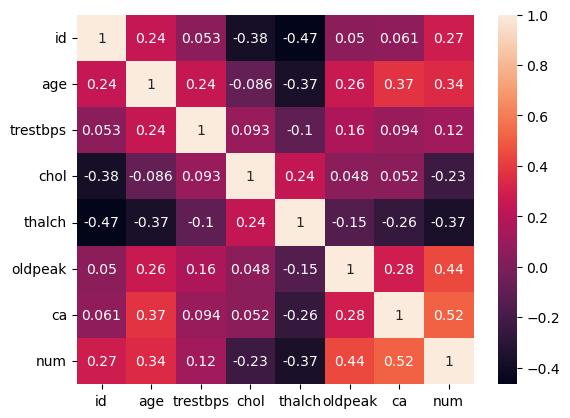

In [8]:
sns.heatmap(data.corr(numeric_only=True),annot=True,color= ['red','blue'])

***Inference***
* Although 'num' and 'ca' are encoded categories but 0.5 to value of correlation could indicate patients on later stages might show
  more colored vessels in fluoroscopy.
* patients with heart disease could have higher ST depression induced by exercise relative to rest(corr= 0.44)
* -0.37 correlation indicates a weak but a negative corr between age and max heart rate achieved.
* we don't have strong corr in the data

***

### Visual Analysis

In [3]:
# separate num cols and cat cols
num_cols = ['age','trestbps','chol','thalch','oldpeak']
cat_cols = ['sex','dataset','cp','fbs','restecg','exang','slope','ca','thal','num']

In [4]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

#### Univariate Analysis for numerical cols

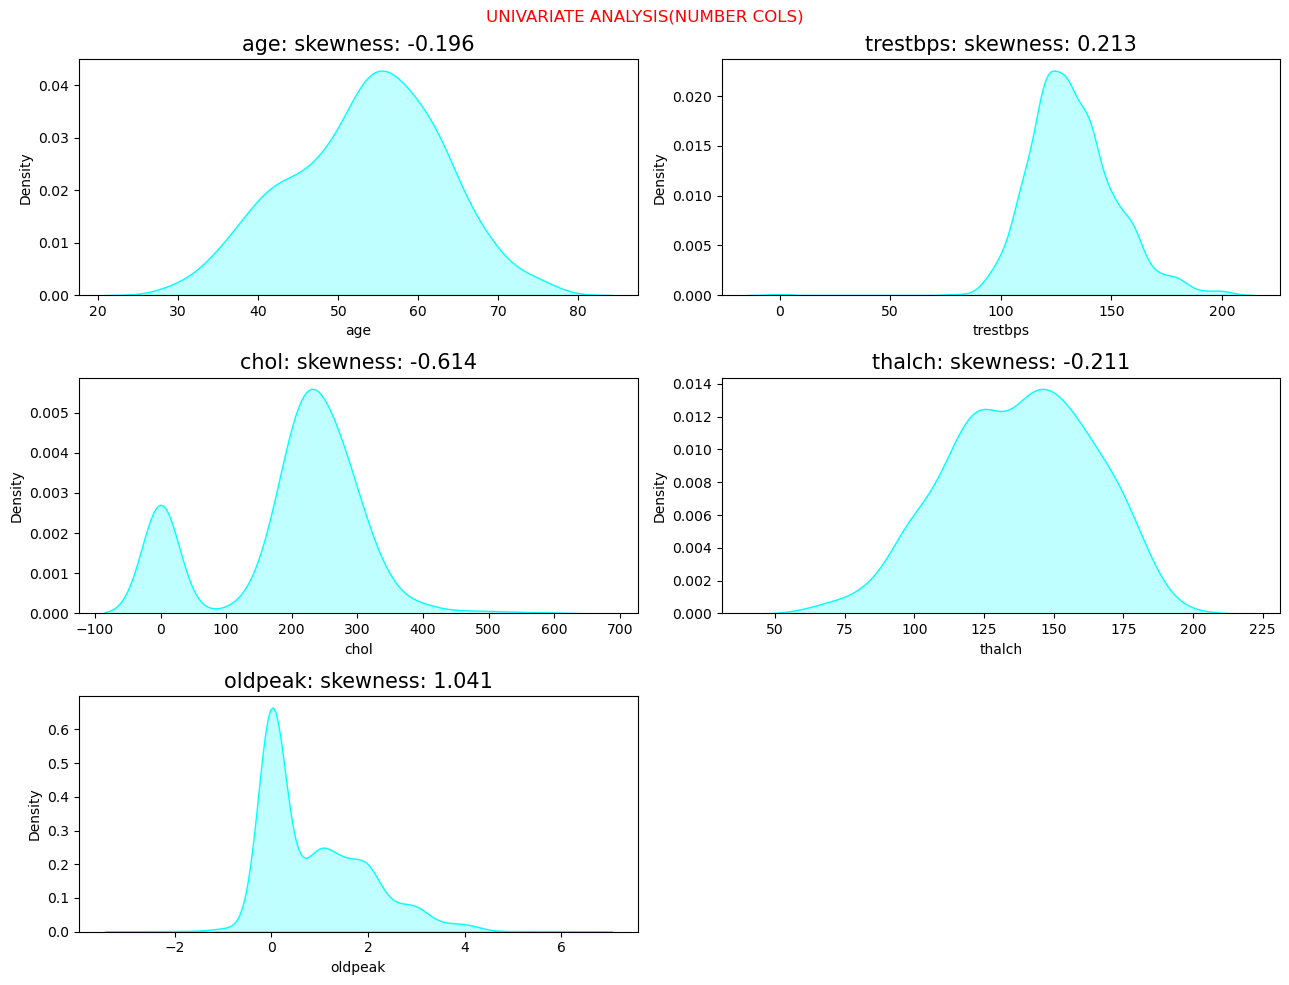

In [14]:
# Explore the distribution of numerical cols


t=1
plt.figure(figsize=[13,10])
plt.suptitle('UNIVARIATE ANALYSIS(NUMBER COLS)',color='red')
for j in  num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data=data,x=j,fill=True,color='cyan')
    skw=data[j].skew()
    plt.title(f'{j}: skewness: {round(skw,3)}',size=15)
    t+=1
plt.tight_layout()
plt.show()

                
    

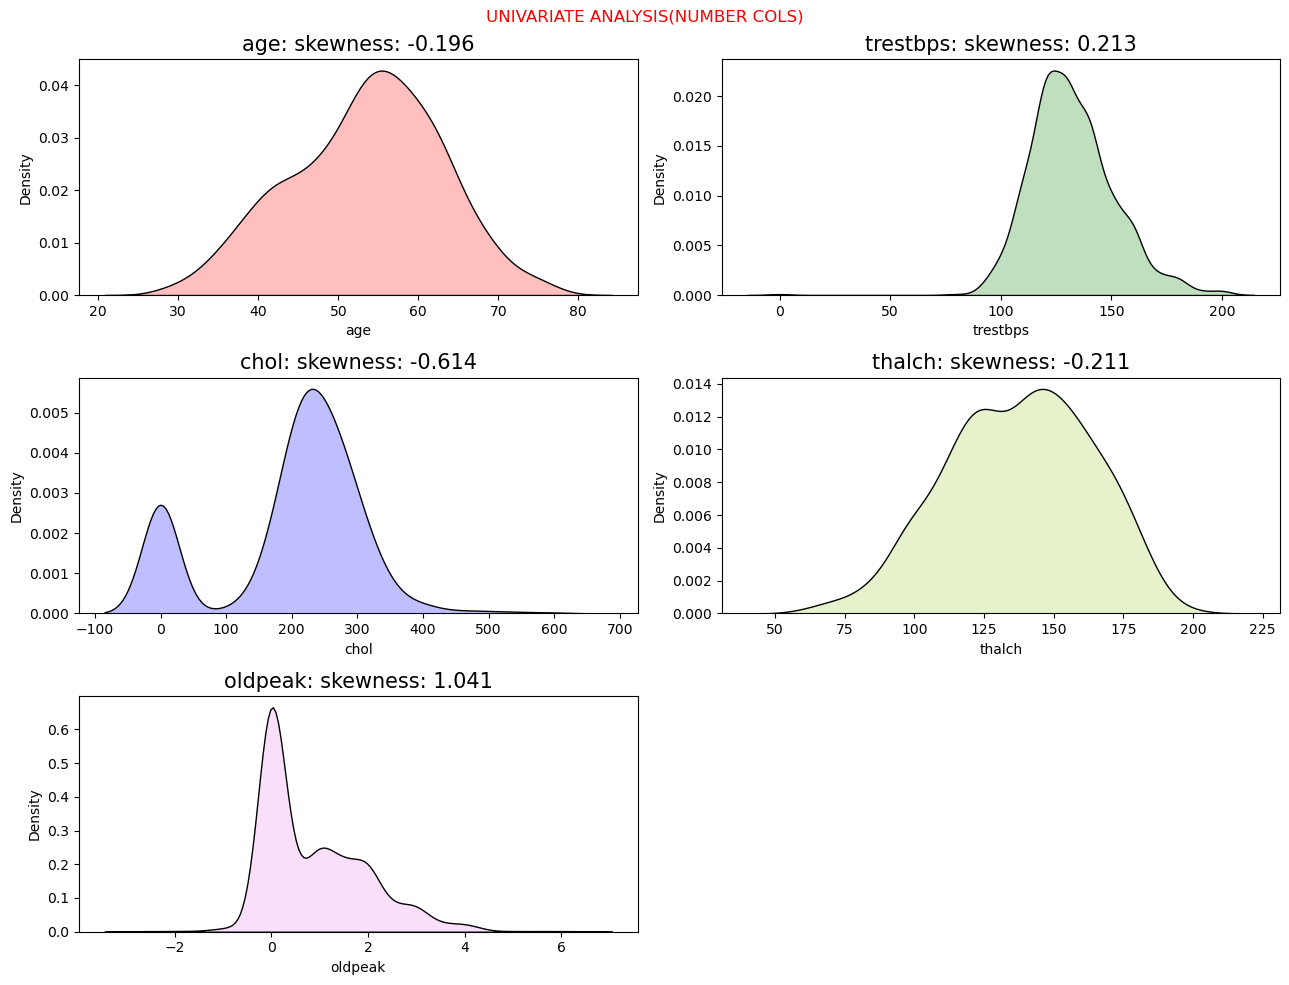

In [17]:
# for getting multiple colors
# here enumerate is a python inbuilt function help to work loop over a sequence 
# it is helpful when we work two loops in a syngle syntax without nested loop feature

colors = ['red','green','blue','yellowgreen','violet']
t = 1
plt.figure(figsize=[13,10])
plt.suptitle('UNIVARIATE ANALYSIS(NUMBER COLS)', color='red')

for i, j in enumerate(num_cols):
    plt.subplot(3, 2, t)
    sns.kdeplot(data=data, x=j, fill=True, color=colors[i % len(colors)],edgecolor='black')
    skw = data[j].skew()
    plt.title(f'{j}: skewness: {round(skw,3)}', size=15)
    t += 1

plt.tight_layout()
plt.show()

***Inferences***
* As discussed in descriptive analysis age has a very wide spread. Most of the patients has age 40 to 77 yrs
* 'trestbps' is although slightly right skewed but we do see some density at 0.This indicates some defect in the data.
* in 'chol' there is a good density on 0 which again indicates some defect in data.
* while most of the patients have serum cholestrol between 200 and 300 mg /dl.
* Distribution of data of 'thalch' indicates max heart rate achieved for most of the population ranges from 100-170 bpm.
* from 'oldpeak' we can infer that ST depression induced by exercise relative to rest is 0 most of the population and very few have negative value in this parameter.
  

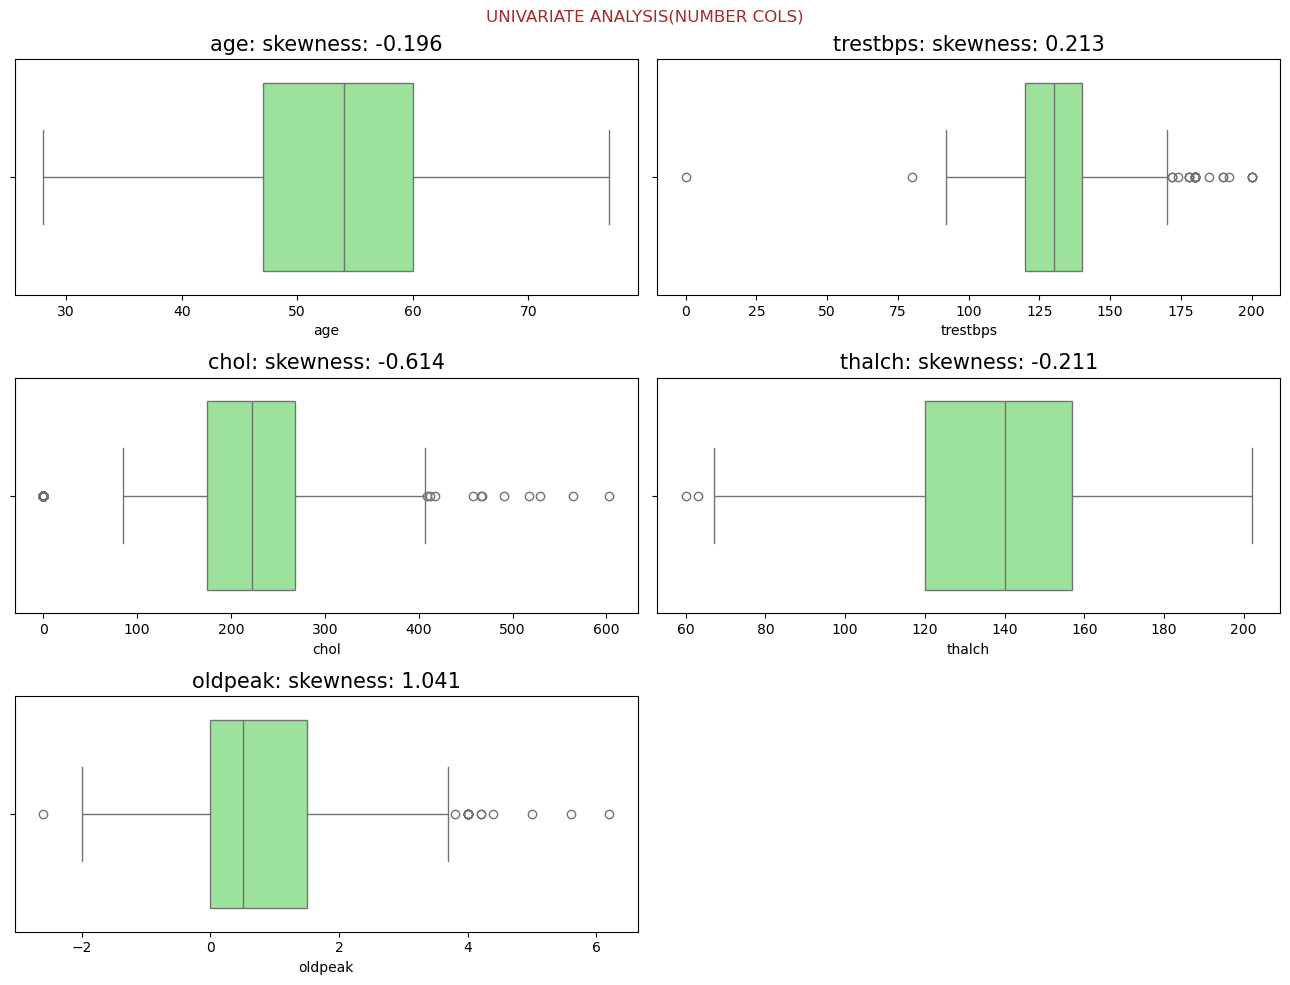

In [48]:
# for clearly indicating outliers present in the data we use boxplot
t=1
plt.figure(figsize=[13,10])
plt.suptitle('UNIVARIATE ANALYSIS(NUMBER COLS)',color='brown')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=data,x=i,fill=True,color='lightgreen')
    skw=data[i].skew()
    plt.title(f'{i}: skewness: {round(skw,3)}',size=15)
    t+=1
plt.tight_layout()
plt.show()

***Inferences***
* 0 value has on extreme outliers in 'trestbps' and 'chol' clearly indicates the defect and correlates with the insights provided above.
* Apart from we do see outliers on upper as well as lower tail,in other features as well.
* 'Age' is quite normal with no outliers and skewness is approx normal range
  

***

### Univariate analysis for categorical cols

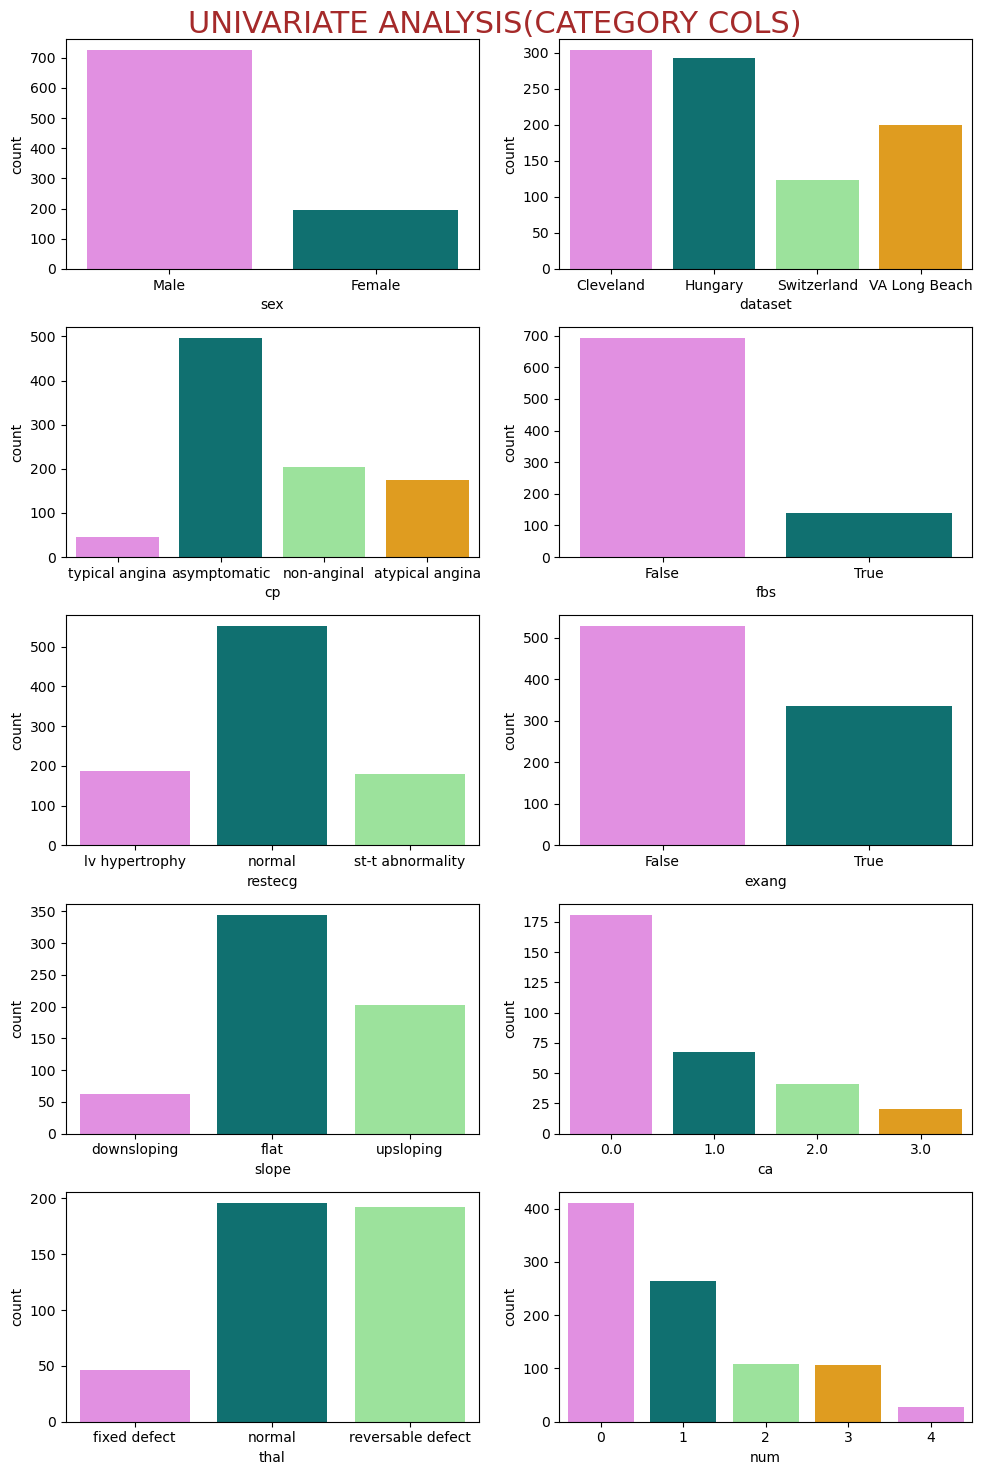

In [59]:
t=1
plt.figure(figsize=[10,15])
plt.suptitle('UNIVARIATE ANALYSIS(CATEGORY COLS)',color='brown',size=22)
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data=data,x=i,palette=['violet','teal','lightgreen','orange'])
    t+=1
plt.tight_layout()
plt.show()

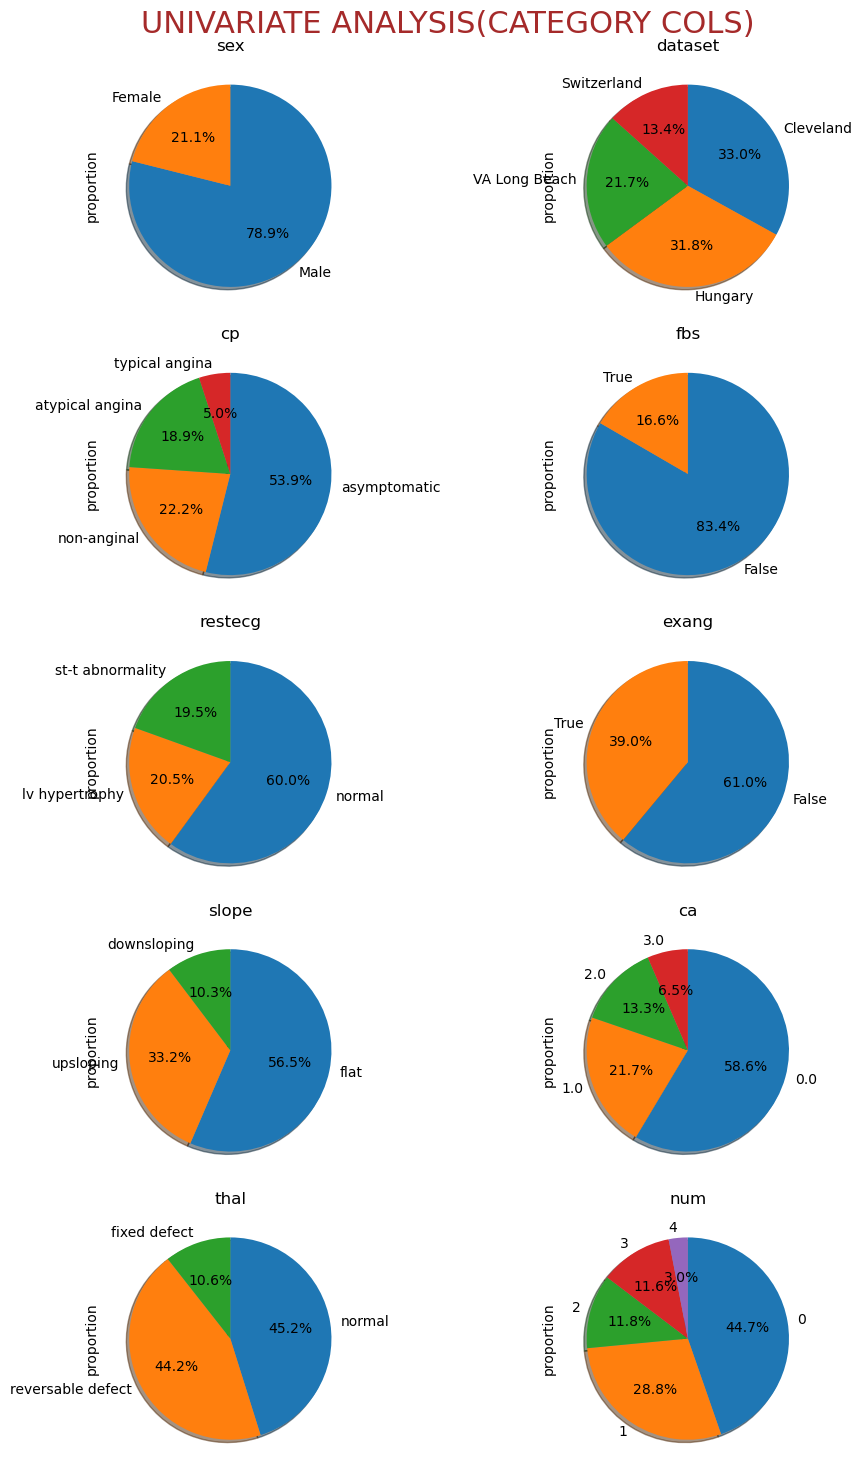

In [65]:
# making pie chart for getting values in percentage for easily interpret the data
t=1
plt.figure(figsize=[10,15])
plt.suptitle('UNIVARIATE ANALYSIS(CATEGORY COLS)',color='brown',size=22)
for i in cat_cols:
    plt.subplot(5,2,t)
    data[i].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',counterclock=False,shadow=True,startangle=90) # radius by default 1
    # plt.pie([1],colors='w',radius=0.5) (used for donut chart)
    plt.title(i,color='black')
    t+=1
plt.tight_layout()
plt.show()

***Inferences***
* Males distribution is higher than the female ~80:20 ratio
* Approx 65% of data is collected from cleveland and hungry
* Most of the patient haven't feel any symptoms of chest pain(i.e. asymptomatic(~54%))
* 83% of fasting blood sugar are reported less than 120 mg/dl.
* 60% restecg reports while resting shows normal.
* 58% of flouroscopies doesn't show any colored vessels.
* Out of total approx 55% patients showed positive results in 'thal' i.e. thalassemia out of which approx 10% were with fixed defect and 44% were reversible defect.
* In the target variable 73% data as either low heart disease or has stage 1 of heat disease. Over all approx 45% are without any heart disease and remaining 55% has some heart disease(initial or later stages).
  

***
***

### Bivariate Analysis

#### num vs cat(Target variable)

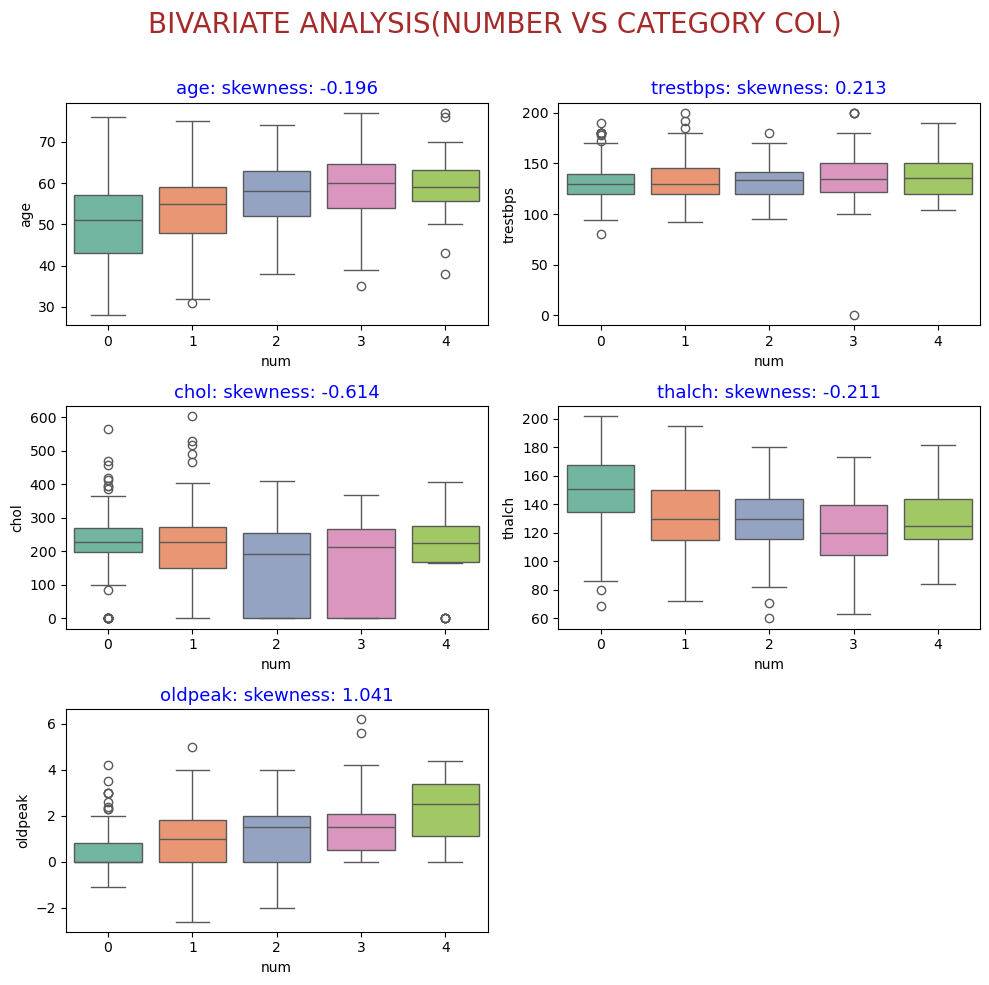

In [76]:
t=1
plt.figure(figsize=[10,10])
plt.suptitle('BIVARIATE ANALYSIS(NUMBER VS CATEGORY COL)\n',color='brown',size=20)
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=data,x='num',y=i,palette='Set2')
    skw=data[i].skew()
    plt.title(f'{i}: skewness: {round(skw,3)}',size=13,color='blue')
    t+=1
plt.tight_layout()
plt.show()

***

#### Cat vs Cat

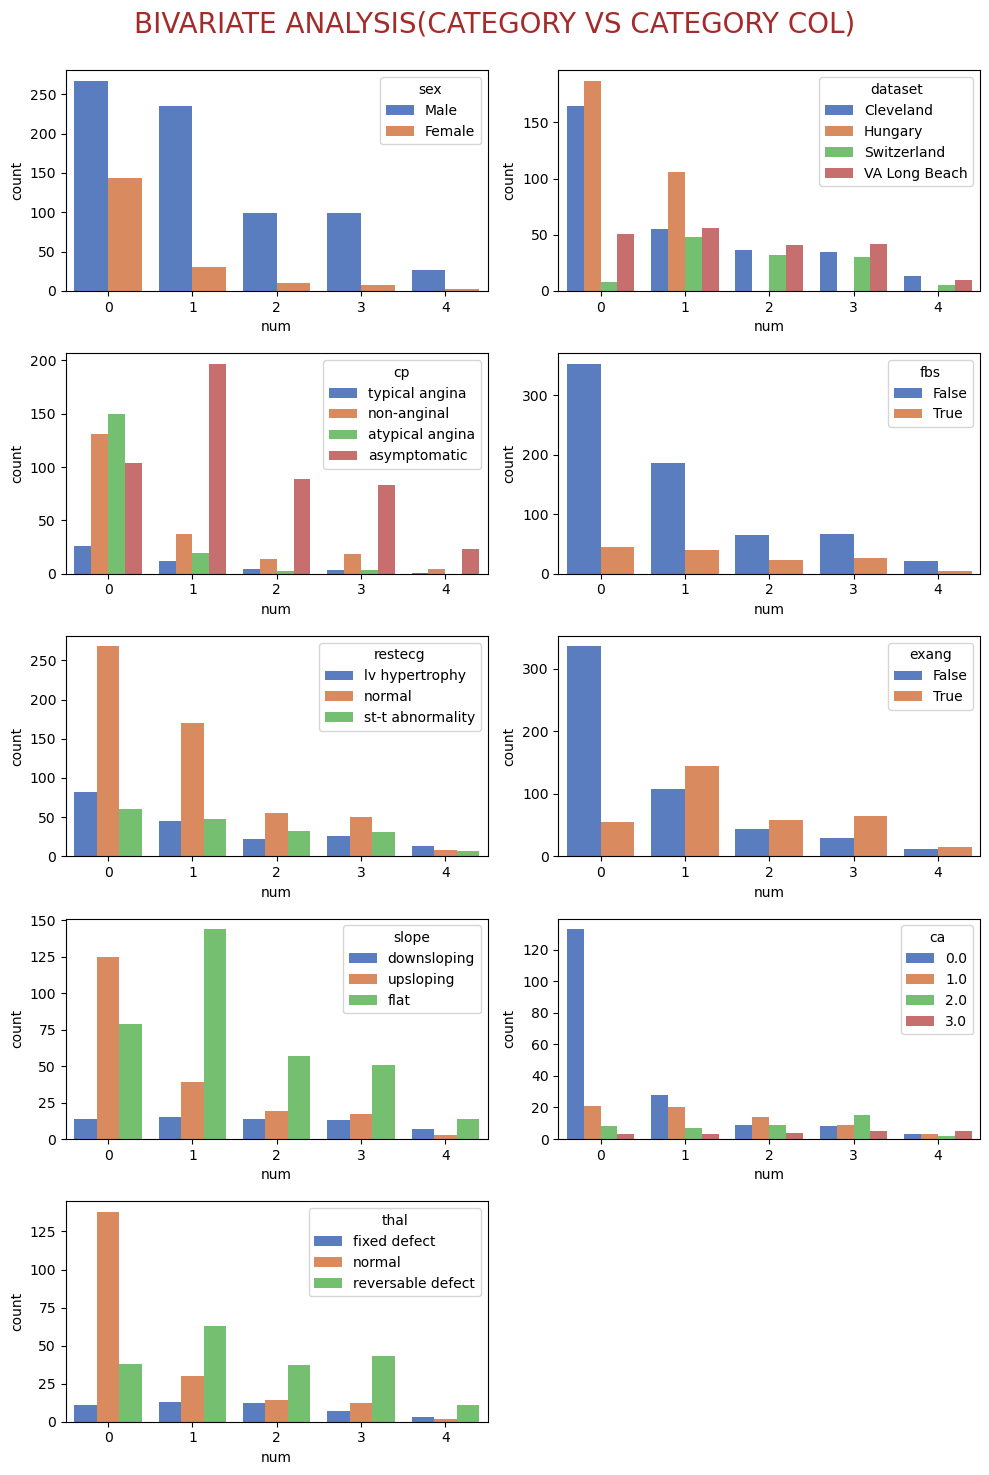

In [25]:
t=1
plt.figure(figsize=[10,15])
plt.suptitle('BIVARIATE ANALYSIS(CATEGORY VS CATEGORY COL)\n',color='brown',size=20)
for i in cat_cols:
    if i!='num':
        plt.subplot(5,2,t)
        sns.countplot(data=data,x='num',hue= i,palette='muted')
        t+=1
plt.tight_layout()
plt.show()

***Inferences***
* In thal if it is normal then there is high chance that heart disease not occur otherwise occur for others
* In Hungary all the patients are in stage 0 and in stage1 while all others have patients of all stages
* patients of typical angina is lesser than the other cp patients


***
***

### Multivariate Analysis

#### pairplot

<Figure size 1000x700 with 0 Axes>

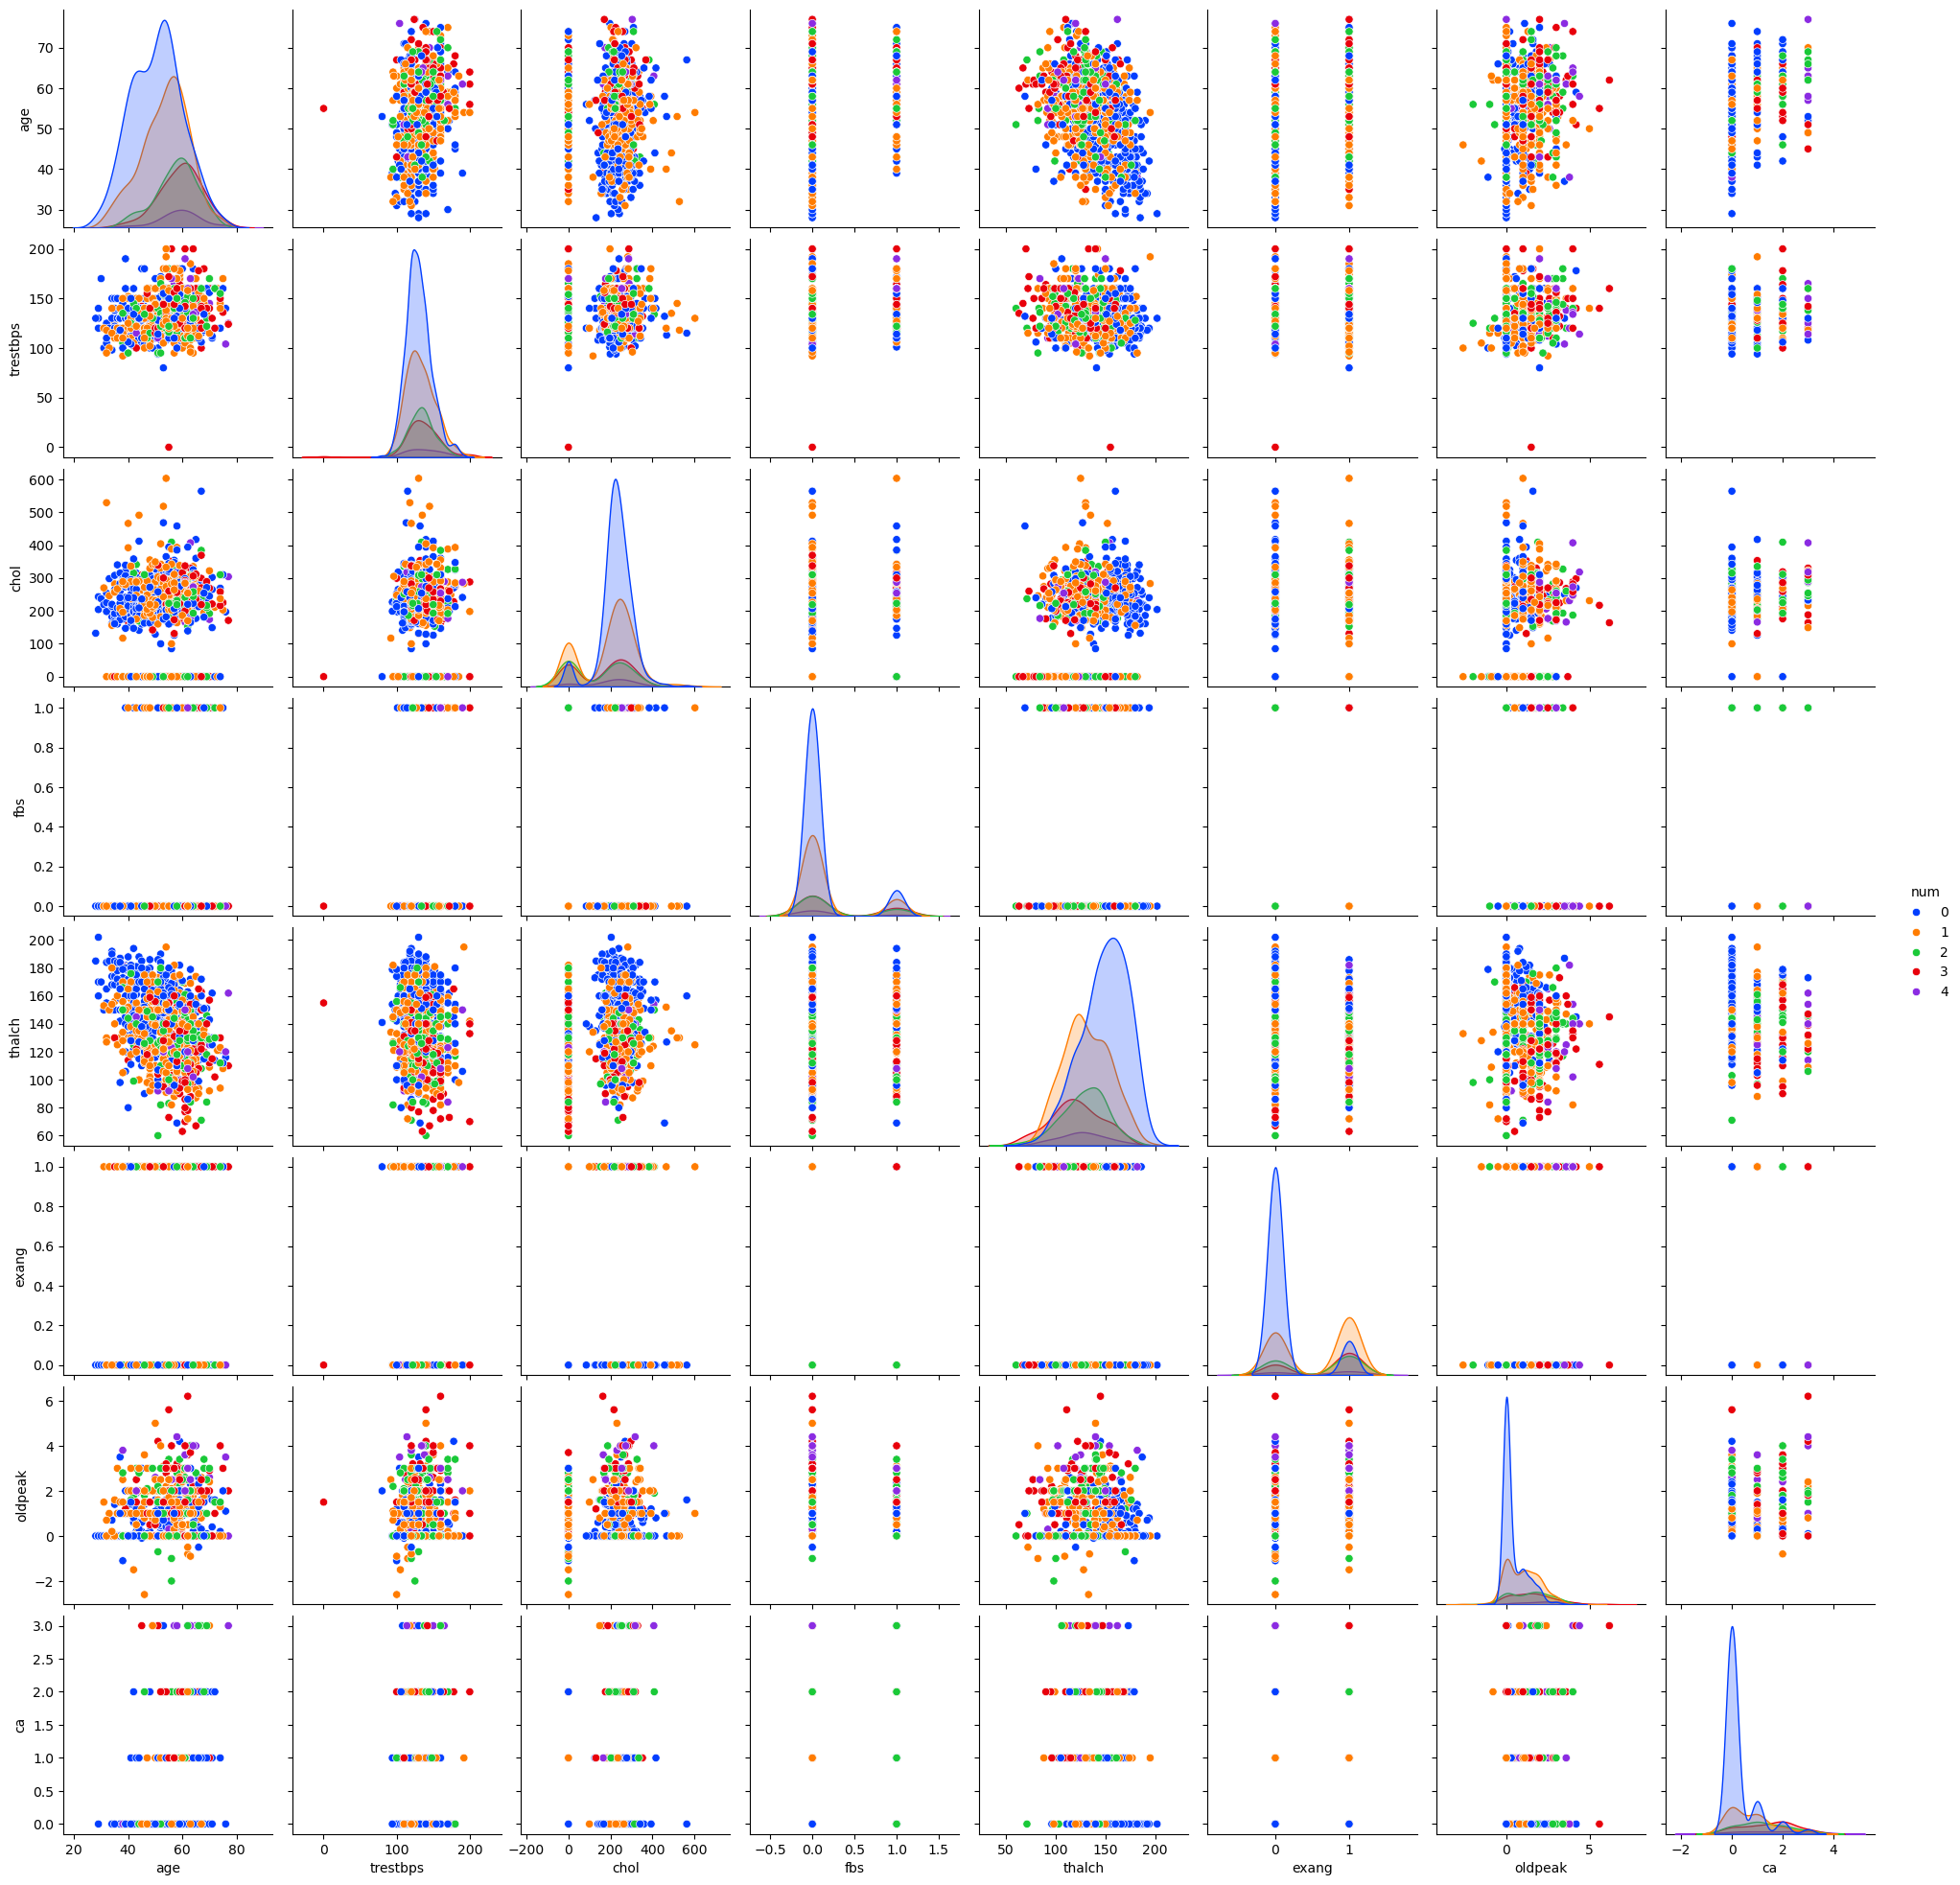

In [85]:
plt.figure(figsize=[10,7])
sns.pairplot(data,diag_kind='kde',hue='num',palette='bright')
plt.show()

***
***


## DATA PREPROCESSING

### Missing Value Treatment

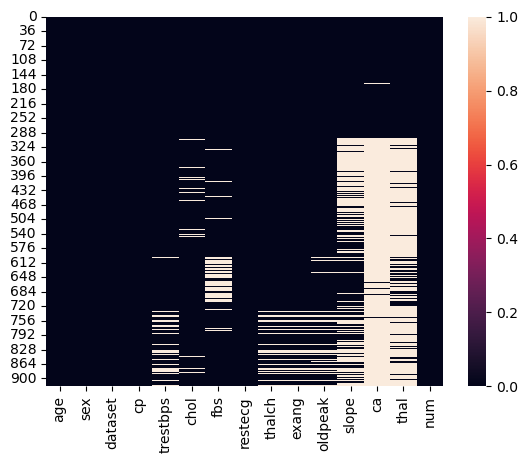

In [86]:
sns.heatmap(data.isnull())
plt.show()

***Inference***
* here max missing values is in 'ca' column 
* no missing values present in 'age','sex','dataset','cp','restecg','num'

***

In [92]:
# find the percentage of missing values
(data.isnull().mean()*100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
dataset      0.000000
cp           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

In [93]:
# In the above chart we can see some rows where 7 or more values out of 15 cols are missing
# There is no point in imputing those missing rows



In [98]:
# find the count of such rows and del them
no_of_missing_rows = data.isnull().sum(axis=1)
no_of_missing_rows[no_of_missing_rows>=5].count()

np.int64(57)

In [99]:
# remove these data
remove_index = no_of_missing_rows[no_of_missing_rows>=5].index
data.drop(index=remove_index,inplace=True)

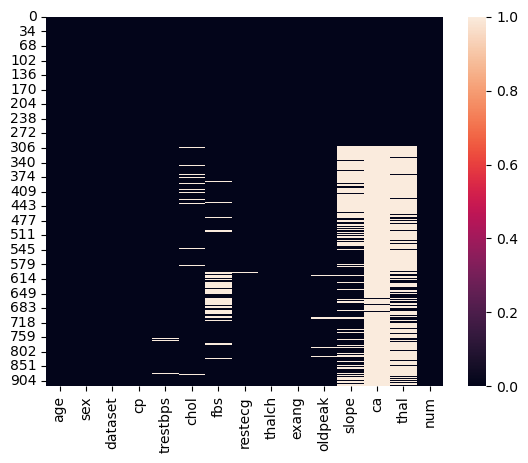

In [100]:
sns.heatmap(data.isnull())
plt.show()

In [101]:
# Now we can see that missing data is less now other operation will be easier for it
# now checking % age of missing values
(data.isnull().mean()*100).sort_values(ascending=False)

ca          64.194670
thal        50.057937
slope       29.316338
fbs         10.196987
chol         3.128621
oldpeak      0.695249
trestbps     0.347625
restecg      0.231750
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
thalch       0.000000
exang        0.000000
num          0.000000
dtype: float64

***

#### Treating missing values

In [103]:
# start treating missing values in restecg','trestbps','oldpeak'.
data[data['restecg'].isnull()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,55,Male,Hungary,typical angina,140.0,295.0,False,NaN,136.0,False,0.0,NaN,NaN,NaN,1
598,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1


In [104]:
data['restecg'].mode()

0    normal
Name: restecg, dtype: object

In [107]:
data['restecg'].fillna(data['restecg'].mode()[0],inplace=True)

In [115]:
# During analysis we observe 0's in'chol' and 'trestbps'. Let's treat 0's as missing values first
# first convert these 0's with nan
data['chol'][data['chol']==0] = np.nan
data['trestbps'][data['trestbps']==0] = np.nan


In [119]:
# check 0's replaced or not
data[data['trestbps']==0]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [122]:
# let's replace missing values of trestbps with median
data['trestbps'].fillna(data['trestbps'].median(),inplace=True)

In [125]:
# for 'chol' impute median  grouped by 'num'
data.groupby(by='num')['chol'].median()

num
0    233.5
1    249.0
2    246.0
3    246.0
4    243.0
Name: chol, dtype: float64

In [126]:
data['chol'].fillna(data['chol'].median(),inplace=True) # replace null values with median

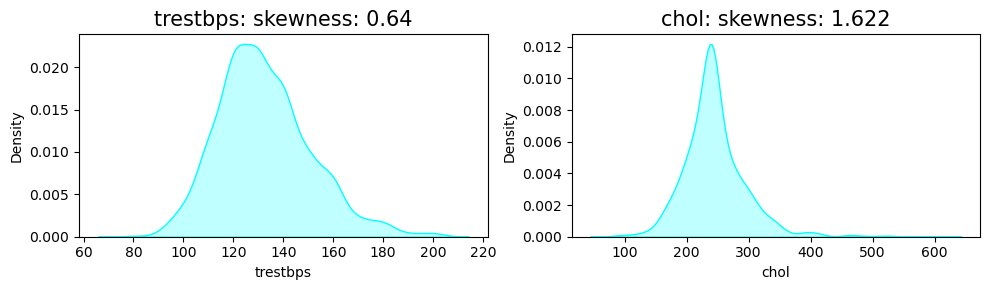

In [129]:

t=1
plt.figure(figsize=[10,3])
for i in ['trestbps','chol']:
    plt.subplot(1,2,t)
    sns.kdeplot(data=data,x=i,fill=True,color='cyan')
    skw=data[i].skew()
    plt.title(f'{i}: skewness: {round(skw,3)}',size=15)
    t+=1
plt.tight_layout()
plt.show()

In [108]:
data[data['restecg'].isnull()]
# because the value is very less so we replace it with mode value

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [124]:
data['chol'].median()
# here the population ranges from 200-300 so we need to replace values with median not mean 

240.0

In [ ]:
# here chol is 0 which can't be possible so, we assume it as a missing value here so we replace it with median

In [132]:
data[data['oldpeak'].isnull()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
606,38,Male,Switzerland,asymptomatic,150.0,240.0,NaN,normal,120.0,True,NaN,NaN,NaN,normal,1
705,65,Male,Switzerland,asymptomatic,145.0,240.0,NaN,st-t abnormality,67.0,False,NaN,NaN,NaN,fixed defect,3
707,65,Male,Switzerland,asymptomatic,160.0,240.0,True,st-t abnormality,122.0,False,NaN,NaN,NaN,reversable defect,3
790,55,Male,VA Long Beach,atypical angina,110.0,214.0,True,st-t abnormality,180.0,False,NaN,NaN,NaN,NaN,0
817,62,Male,VA Long Beach,typical angina,112.0,258.0,False,st-t abnormality,150.0,True,NaN,NaN,NaN,NaN,1
858,53,Male,VA Long Beach,non-anginal,155.0,175.0,True,st-t abnormality,160.0,False,NaN,NaN,NaN,fixed defect,0


In [133]:
data['oldpeak'].fillna(data['oldpeak'].median(),inplace=True)

In [135]:
(data.isnull().mean()*100).sort_values(ascending=False)

ca          64.194670
thal        50.057937
slope       29.316338
fbs         10.196987
dataset      0.000000
sex          0.000000
age          0.000000
chol         0.000000
trestbps     0.000000
cp           0.000000
restecg      0.000000
oldpeak      0.000000
exang        0.000000
thalch       0.000000
num          0.000000
dtype: float64

In [136]:
# now replace the nan values in fbs
data['fbs'].value_counts()

fbs
False    658
True     117
Name: count, dtype: int64

In [ ]:
# here mode of every value is false so we replace data of missing into false
# her fbs,thal,slope,ca all are categories so with simple imputer we replace all nan with mode

In [140]:
# Treat remaining categorical col with mode using SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent') # here most frequent means mode


In [ ]:
# This will treat all missing columns rown in one go
cols_to_impute = ['fbs','slope','thal','ca']
data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])

In [144]:
data.isnull().sum() # now all missing values treated

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

***
***

### Outlier Treatment

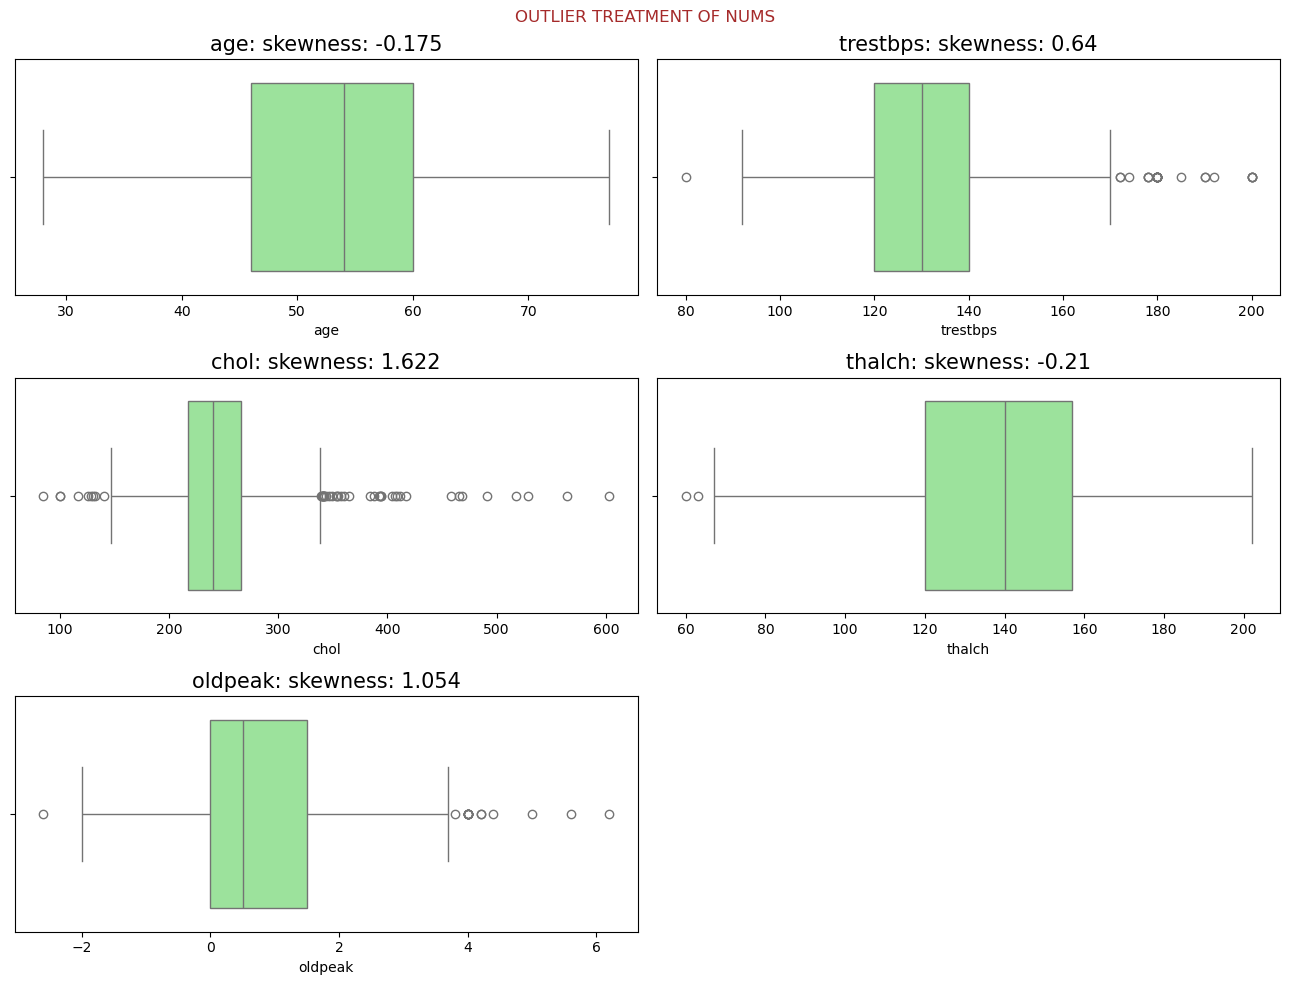

In [147]:
t=1
plt.figure(figsize=[13,10])
plt.suptitle('OUTLIER TREATMENT OF NUMS',color='brown')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=data,x=i,fill=True,color='lightgreen')
    skw=data[i].skew()
    plt.title(f'{i}: skewness: {round(skw,3)}',size=15)
    t+=1
plt.tight_layout()
plt.show()

***Inference***
* we see some outliers in data but there are no extreme outliers as such. Lt's do one thing instead of treating these outliers let's keep them in the data and perform feature transformation, That way there effect or their influence on the distribution will not be significant.

***
***

### Feature Encoading
***for binary categories we do n-1 encoading***
***for other's we do feature encoding***

#### N-1 Encoading


In [151]:
dummy_enc=['sex','fbs','exang']

In [153]:
data = pd.get_dummies(data=data,columns=dummy_enc,drop_first=True,dtype=int)

In [154]:
data.head(2)

,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal,num,sex_Male,fbs_True,exang_True
0,63,Cleveland,typical angina,145.0,233.0,lv hypertrophy,150.0,2.3,downsloping,0.0,fixed defect,0,1,1,0
1,67,Cleveland,asymptomatic,160.0,286.0,lv hypertrophy,108.0,1.5,flat,3.0,normal,2,1,0,1


***

#### Target Encoding

In [155]:
target_enc=['dataset','cp','restecg','slope','thal']

In [156]:
for i in target_enc:
    map_dict = data.groupby(by=i)['num'].mean()
    data[i]=data[i].map(map_dict)

In [157]:
data.head(2)

,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal,num,sex_Male,fbs_True,exang_True
0,63,0.934211,0.714286,145.0,233.0,1.176796,150.0,2.3,1.746032,0.0,1.521739,0,1,1,0
1,67,0.934211,1.427350,160.0,286.0,1.176796,108.0,1.5,0.981605,3.0,0.738854,2,1,0,1


In [158]:
# here we will not take remaining columns because encoding is done only for categorical col for converting cat into nos


In [159]:
data.dtypes

age             int64
dataset       float64
cp            float64
trestbps      float64
chol          float64
restecg       float64
thalch        float64
oldpeak       float64
slope         float64
ca             object
thal          float64
num             int64
sex_Male        int64
fbs_True        int64
exang_True      int64
dtype: object

In [161]:
# 'ca' is although no but has wrongly being assigned as object
data['ca'] = data['ca'].astype(int)

In [162]:
data.dtypes # now ca is changed

age             int64
dataset       float64
cp            float64
trestbps      float64
chol          float64
restecg       float64
thalch        float64
oldpeak       float64
slope         float64
ca              int64
thal          float64
num             int64
sex_Male        int64
fbs_True        int64
exang_True      int64
dtype: object

***
***

### Feature Scaling & feature Transformation

In [164]:
# now we do feature scaling for numerical cols
transform_cols = ['age','trestbps','chol','thalch','oldpeak']

In [165]:
transformer= PowerTransformer(method='yeo-johnson',standardize = True)

In [167]:
data[transform_cols] = transformer.fit_transform(data[transform_cols])

In [168]:
data.head()

,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal,num,sex_Male,fbs_True,exang_True
0,1.058442,0.934211,0.714286,0.755318,-0.156420,1.176796,0.456200,1.272838,1.746032,0,1.521739,0,1,1,0
1,1.516505,0.934211,1.427350,1.428132,0.859622,1.176796,-1.143935,0.718593,0.981605,3,0.738854,2,1,0,1
2,1.516505,0.934211,1.427350,-0.628905,-0.242379,1.176796,-0.367435,1.456211,0.981605,2,1.603175,1,1,0,1
3,-1.673784,0.934211,0.580645,-0.028394,0.192977,0.819549,2.009425,1.948841,1.746032,0,0.738854,0,1,0,0
4,-1.284366,0.934211,0.185629,-0.028394,-0.816664,1.176796,1.364927,0.640905,0.693069,0,0.738854,0,0,0,0


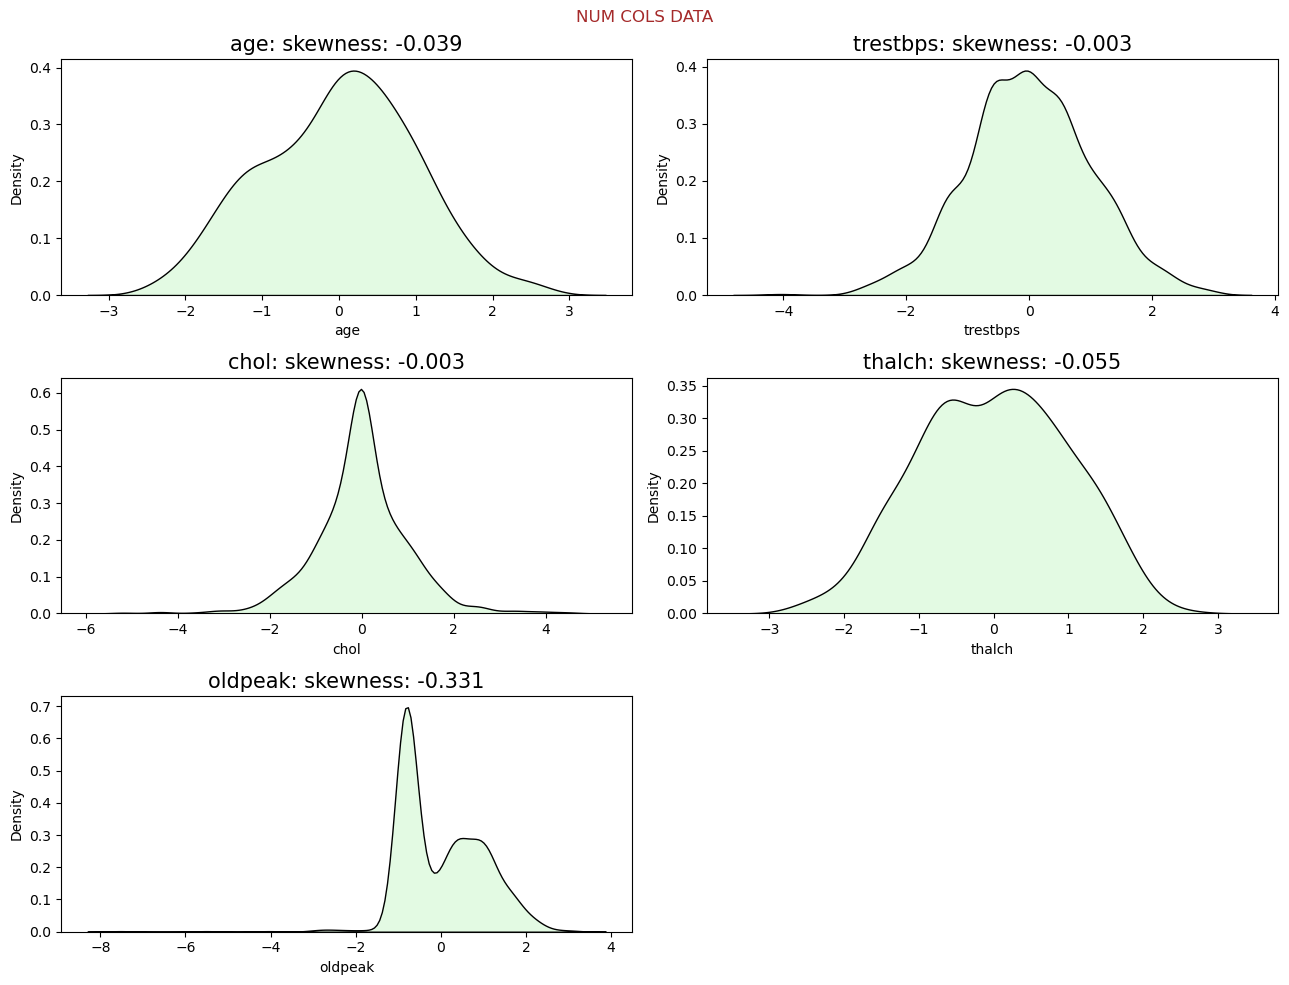

In [170]:
t=1
plt.figure(figsize=[13,10])
plt.suptitle('NUM COLS DATA',color='brown')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data=data,x=i,fill=True,color='lightgreen',edgecolor='black')
    skw=data[i].skew()
    plt.title(f'{i}: skewness: {round(skw,3)}',size=15)
    t+=1
plt.tight_layout()
plt.show()

perform inverse tranformation
transformer.inverse_transform(data[transform_cols])